In [1]:
import numpy as np
from scipy.integrate import ode
from scipy.constants import pi, hbar, m_n
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
def inveos(w0):
    return (((w0/k)**(1/Gamma))+(w0/(Gamma-1)))

In [3]:
def proper_mass(w0c):
    return (4.1527016657509564e-15*(240807.0242709895 + (0.00006182724270423636*(1.*w0c**0.4273504273504274 + 0.1042783971192832*w0c)**2)/
           (0.6666666666666666 - 1.*a0b**4*B4b)**2 + (2.887476965676601*w0c**0.4273504273504274 + 0.30110146969960744*w0c)/
           (0.6666666666666666 - 1.*a0b**4*B4b))*(7.156502951064422*w0c**0.4273504273504274 + 0.746268656716418*w0c))

In [4]:
def feqs(x,z): 
    w0, m, mp, A0t, u, f, h = z
    y=inveos(w0)
    dmdx=3*y*x**2
    dmpdx=3*y*x**2/math.sqrt(h)
    dfdx=(-4*B4b*(A0t**2/f)**n*f*(A0t*(-1 + h) + 4*h*n*u*x) - 2**n*A0t*(h*u**2*x**2 + 2*f*(-1 + h - 8*pi*w0*x**2)))/(2.*A0t*h*(2**n - 2*B4b*(A0t**2/f)**n*(-1 + 2*n))*x)
    dw0dx=-(dfdx*(w0 + y))/(2*f)
    dA0tdx=u
    dhdx=1/x - h/x + (2**(-1 + n)*x*(h*u**2 - 16*f*pi*y))/(f*(2**n - 2*B4b*(A0t**2/f)**n*(-1 + 2*n)))
    dudx=-((2**(-1 - n)*(-(2**n*A0t*dfdx*h*u*x**2) + 8*B4b*(A0t**2/f)**n*f**2*n*(-1 + h + dhdx*x) + 2**n*A0t*f*u*x*(4*h + dhdx*x)))/(A0t*f*h*x**2))
    return np.array([dw0dx, dmdx, dmpdx, dA0tdx, dudx, dfdx, dhdx])

In [5]:
def feqssolv(w0c): 
    eqs=ode(feqs)
    eqs.set_integrator('dopri5', atol=1e-10)
    x=np.arange(1e-3, 0.222895, dx) 
    m=np.zeros_like(x)
    w0=np.zeros_like(x)
    A0t=np.zeros_like(x)
    u=np.zeros_like(x)
    f=np.zeros_like(x)
    h=np.zeros_like(x)
    mp=np.zeros_like(x)
    
   
    w0gen=6.633787136581382e-35*(1.5074345609999996e34*w0c - (1.6169581928225423e30*(1.*w0c**0.4273504273504274 + 0.2440114492591227*w0c)*(a0b**(4*n)*B4b**2*n**2*(-32.*w0c**0.4273504273504274 - 3.3369087078170625*w0c) + 4**n*a0b**2*(1.*w0c**0.4273504273504274 + 0.5234775535388018*w0c) + 2**n*a0b**(2 + 2*n)*B4b*(2.*w0c**0.4273504273504274 + (1.0469551070776035 - 1.6767966256780742*n)*w0c)))/(a0b**2*(2**n + a0b**(2*n)*B4b*(2. - 4.*n))**2))
    A0t0gen=0.000040955575317710555*(24416.70010108652*a0b + (B4b*n*(-0.7319416032957167*w0c**0.4273504273504274 - 0.0763256971765956*w0c))/(a0b*((-0.25*2**n)/a0b**(2*n) - 0.5*B4b + 1.*B4b*n)))
    u0gen=(B4b*n*(-0.05995417892388708*w0c**0.4273504273504274 - 0.006251925678785656*w0c))/(a0b*((-0.25*2**n)/a0b**(2*n) - 0.5*B4b + 1.*B4b*n))
    f0gen=(16.*a0b**(2 + 4*n)*B4b**2*(0.5 - 1.*n)**2 + a0b**(4*n)*B4b**2*n**2*(-0.0009592668627821935*w0c**0.4273504273504274 - 0.00010003081086057053*w0c) + 4**n*a0b**2*(1. + 0.000029977089461943548*w0c**0.4273504273504274 + 0.000015692333453752005*w0c) + 2**n*a0b**(2 + 2*n)*B4b*(4. + n*(-8. - 0.0000502654824574367*w0c) + 0.000059954178923887095*w0c**0.4273504273504274 + 0.00003138466690750401*w0c))/(a0b**2*(2**n + a0b**(2*n)*B4b*(2. - 4.*n))**2)
    h0gen=1 + (2**n*(-0.000059954178923887095*w0c**0.4273504273504274 - 6.251925678785658e-6*w0c))/(2**n + a0b**(2*n)*B4b*(2. - 4.*n))
    m0gen=(2**n*(7.156502951064422e-9*w0c**0.4273504273504274 + 7.46268656716418e-10*w0c))/(2**n + a0b**(2*n)*B4b*(2. - 4.*n))
    mp0gen=proper_mass(w0c)
    
    m[0]=m0gen
    mp[0]=mp0gen
    w0[0]=w0gen
    A0t[0]=A0t0gen
    u[0]=u0gen
    f[0]=f0gen
    h[0]=h0gen
    z=np.array([w0[0], m[0], mp[0], A0t[0], u[0], f[0], h[0]]) 
    eqs.set_initial_value(z,x[0])
    i=0
    while eqs.successful()  and w0[i] > 0.0 and i < len(x)-1:
        eqs.integrate(x[i] + dx)
        w0[i+1] = eqs.y[0]
        m[i+1] = eqs.y[1]
        mp[i+1]=eqs.y[2]
        A0t[i+1]=eqs.y[3]
        u[i+1] = eqs.y[4]
        f[i+1] = eqs.y[5]
        h[i+1] = eqs.y[6]
        i=i+1
    return x[i-1], m[i-1], mp[i-1]

In [6]:
def mass_radio_Graph(B3tp):
    w0c=np.arange(0.121682,179.813,0.1)
    M=np.zeros_like(w0c)
    Mp=np.zeros_like(w0c)
    X=np.zeros_like(w0c)
    
    j=0
    for j in range (len(w0c)): 
         X[j], M[j], Mp[j] =feqssolv(w0c[j])
    return [X, M, Mp]

In [7]:
Gamma = 2.34 
k=0.010
dx=0.0001 

In [8]:
n=2
B4b=-0.1
a0b=1.0
mass_radio_a=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/william/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


In [9]:
n=2
B4b=-0.1
a0b=1.2
mass_radio_b=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [10]:
n=2
B4b=-0.1
a0b=1.3
mass_radio_c=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [11]:
n=2
B4b=-0.1
a0b=1.4
mass_radio_d=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [12]:
n=2
B4b=0.1
a0b=1.0
mass_radio_e=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [13]:
n=2
B4b=0.1
a0b=1.5
mass_radio_f=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [14]:
n=2
B4b=0.0
a0b=0.0001
mass_radio_GR=mass_radio_Graph(2)

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


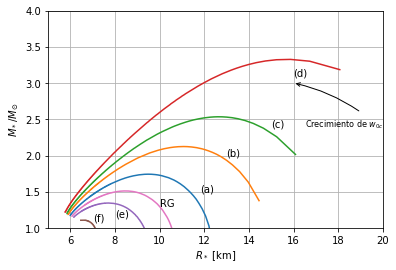

In [89]:
plt.plot(mass_radio_a[0]*89.7285,mass_radio_a[1]*254.62)
plt.plot(mass_radio_b[0]*89.7285,mass_radio_b[1]*254.62)
plt.plot(mass_radio_c[0]*89.7285,mass_radio_c[1]*254.62)
plt.plot(mass_radio_d[0]*89.7285,mass_radio_d[1]*254.62)
plt.plot(mass_radio_e[0]*89.7285,mass_radio_e[1]*254.62)
plt.plot(mass_radio_f[0]*89.7285,mass_radio_f[1]*254.62)
plt.plot(mass_radio_GR[0]*89.7285,mass_radio_GR[1]*254.62)
texto1 = plt.text(7, 1.1, r'(f)', fontsize=10)
texto2 = plt.text(8, 1.15, r'(e)', fontsize=10)
texto3 = plt.text(10, 1.3, r'RG', fontsize=10)
texto4 = plt.text(11.8, 1.5, r'(a)', fontsize=10)
texto5 = plt.text(13, 2, r'(b)', fontsize=10)
texto6 = plt.text(15, 2.4, r'(c)', fontsize=10)
texto7 = plt.text(16, 3.1, r'(d)', fontsize=10)
texto8 = plt.text(16.5, 2.4, r'Crecimiento de $w_{0c}$', fontsize=8)
nota = plt.annotate(r''
                    ,xy=(16, 3),xycoords='data'
                    ,xytext=(19, 2.6),fontsize=9
                    ,arrowprops=dict(arrowstyle="->"
                    ,connectionstyle="arc3,rad=.1"))
plt.xlabel('$R_*$ [km]')
plt.ylabel('$M_*/M_{\odot}$')
plt.xlim(right=20,left=5)
plt.ylim(bottom=1.0,top=4)
plt.grid()
#plt.savefig('masaradiocuartica.pdf', format='pdf', dpi=1200)
plt.show()

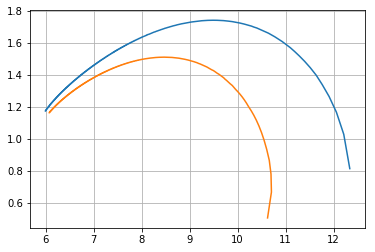

In [93]:
plt.plot(mass_radio_a[0]*89.7285,mass_radio_a[1]*254.62)
#plt.plot(mass_radio_b[0]*89.7285,mass_radio_b[1]*254.62)
plt.plot(mass_radio_GR[0]*89.7285,mass_radio_GR[1]*254.62)
plt.grid()
#plt.savefig('masaradiocuartica.pdf', format='pdf', dpi=1200)
plt.show()

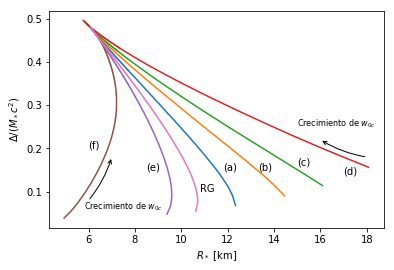

In [87]:
plt.plot(mass_radio_a[0]*89.7285,(mass_radio_a[2]-mass_radio_a[1])/mass_radio_a[1])
plt.plot(mass_radio_b[0]*89.7285,(mass_radio_b[2]-mass_radio_b[1])/mass_radio_b[1])
plt.plot(mass_radio_c[0]*89.7285,(mass_radio_c[2]-mass_radio_c[1])/mass_radio_c[1])
plt.plot(mass_radio_d[0]*89.7285,(mass_radio_d[2]-mass_radio_d[1])/mass_radio_d[1])
plt.plot(mass_radio_e[0]*89.7285,(mass_radio_e[2]-mass_radio_e[1])/mass_radio_e[1])
plt.plot(mass_radio_f[0]*89.7285,(mass_radio_f[2]-mass_radio_f[1])/mass_radio_f[1])
plt.plot(mass_radio_GR[0]*89.7285,(mass_radio_GR[2]-mass_radio_GR[1])/mass_radio_GR[1])
texto1 = plt.text(6, 0.2, r'(f)', fontsize=10)
texto2 = plt.text(8.5, 0.15, r'(e)', fontsize=10)
texto3 = plt.text(10.8, 0.1, r'RG', fontsize=10)
texto4 = plt.text(11.8, 0.15, r'(a)', fontsize=10)
texto5 = plt.text(13.3, 0.15, r'(b)', fontsize=10)
texto6 = plt.text(15, 0.16, r'(c)', fontsize=10)
texto7 = plt.text(17, 0.14, r'(d)', fontsize=10)
texto8 = plt.text(15, 0.25, r'Crecimiento de $w_{0c}$', fontsize=8)
texto8 = plt.text(5.8, 0.06, r'Crecimiento de $w_{0c}$', fontsize=8)
nota = plt.annotate(r''
                    ,xy=(16, 0.22),xycoords='data'
                    ,xytext=(18, 0.18),fontsize=9
                    ,arrowprops=dict(arrowstyle="->"
                    ,connectionstyle="arc3,rad=-.1"))
nota = plt.annotate(r''
                    ,xy=(7, 0.18),xycoords='data'
                    ,xytext=(6, 0.08),fontsize=9
                    ,arrowprops=dict(arrowstyle="->"
                    ,connectionstyle="arc3,rad=.1"))
plt.xlabel('$R_*$ [km]')
plt.ylabel('$\Delta/(M_* c^2)$')
#plt.xlim(right=20,left=5)
#plt.ylim(bottom=1.0,top=4)
#plt.grid()
plt.savefig('bindingcuartica.pdf', format='pdf', dpi=1200)
plt.show()